In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
from tqdm import tqdm
from sklearn import metrics
from datetime import timedelta
from numpy import linalg
import statsmodels

import warnings
warnings.filterwarnings("ignore")

In [161]:
def plot_acf_pacf(timeseries):
    """
    Функция, отображающая график временного ряда, 
    автокорреляционную функцию(ACF)
    и частную автокорреляционную функцию(PACF).
    """
    fig = plt.figure(figsize=(16,20))
    
    ax0 = fig.add_subplot(311)
    timeseries.plot(ax=ax0)
    ax0.set_title('График временного ряда')
    ax0.set_xlabel('Дата')
    ax0.set_ylabel('Количество новых заболеваний')
    
    ax1 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(timeseries, ax=ax1)
    ax1.set_title('Автокорреляционная функция')
    
    ax2 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(timeseries, ax=ax2)
    ax2.set_title('Частная автокорреляционная функция')

def adf_test(timeseries):
    pvalue = sm.tsa.stattools.adfuller(timeseries)[1]
    print("Критерий Дики-Фуллера: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен, нужно большее d")
    else:
        print("Ряд стационарен, d подходит")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("Критерий Дики-Фуллера с константой: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("Критерий Дики-Фуллера с константой и трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ctt')[1]
    print("Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("Критерий Дики-Фуллера без константы и тренда: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")

In [162]:
# функция с построением моделей
def adf_test3(timeseries):
    dif_1 = ts.diff().dropna()  
    print('\nШАГ 1')
    print('\nОцениваем модель авторегрессии 1го порядка с трендом и константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='ct').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("\nКритерий Дики-Фуллера с константой и линейным трендом (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue < 0.05:
        print("\nРяд класса TS")  
    else:
        # нулевая гипотеза принимается 
        print('\nСтроим модель только с трендом и конст, чтобы убедиться, что правильно включили тренд')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='ct').fit().summary()) 
        print("\nЕсли коэффициент при тренде значим, ряд класса DS (случайное блуждание с дрейфом и детерминированным трендом)")         
    
    print('\nШАГ 2')
    print('\nОцениваем модель авторегрессии 1го порядка с константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='c').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("\nКритерий Дики-Фуллера с константой (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается  
        print('\nСтроим модель только с конст, чтобы убедиться, что правильно включили конст')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='c').fit().summary())
        print("\nЕсли коэффициент при константе значим, ряд класса DS (случайное блуждание с дрейфом)")
    else:
        print("\nРяд класса TS (стационарный ряд с ненулевой средней)")
 
    print('\nШАГ 3')
    print('\nОцениваем модель авторегрессии 1го порядка без константы')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='n').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("\nКритерий Дики-Фуллера без константы и тренда (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается 
        print("\nРяд класса DS (случайное блуждание без дрейфа)")  
    else:
        print("\nРяд класса TS (процесс AR с нулевым мат ожиданием)")

# Загрузка данных

In [171]:
ts = pd.read_excel('data\lab5_region_2.xlsx',  index_col='date', parse_dates=['date'])['new_cases'].dropna() # !!!!!!!!!!
print(f"Длина временного ряда: {ts.shape[0]}")
ts = ts.resample('1W').mean()[:-1]
ts.head(15)


Длина временного ряда: 617


date
2020-04-12     0.000000
2020-04-19     0.428571
2020-04-26     0.000000
2020-05-03     0.428571
2020-05-10     2.142857
2020-05-17    16.000000
2020-05-24    18.571429
2020-05-31    49.857143
2020-06-07    62.000000
2020-06-14    86.857143
2020-06-21    83.428571
2020-06-28    76.285714
2020-07-05    67.142857
2020-07-12    66.000000
2020-07-19    64.000000
Freq: W-SUN, Name: new_cases, dtype: float64

In [172]:
fig = plt.figure(figsize=(16,20))
    
ax0 = fig.add_subplot(311)
ts.plot(ax=ax0)
ax0.set_title('График временного ряда')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

Text(0, 0.5, 'Количество новых заболеваний')

# Определение типа ряда

In [173]:
adf_test3(ts)


ШАГ 1

Оцениваем модель авторегрессии 1го порядка с трендом и константой
                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                   88
Model:                     AutoReg(1)   Log Likelihood                -313.170
Method:               Conditional MLE   S.D. of innovations              8.853
Date:                Sun, 26 Dec 2021   AIC                              4.453
Time:                        18:07:32   BIC                              4.567
Sample:                    04-19-2020   HQIC                             4.499
                         - 12-12-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.0293      2.116      0.486      0.627      -3.119       5.177
trend            0.0422      0.046      0.920      

# Определение порядка разности d и компонент p, q.

### График временного ряда, АКФ и ЧАКФ

In [174]:
adf_test(ts)
plot_acf_pacf(ts)

Критерий Дики-Фуллера: p=0.344297
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.344297
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.317755
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.769838
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.739150
Ряд нестационарен


### График первых разностей

Критерий Дики-Фуллера: p=0.001403
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.001403
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.008735
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.012008
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.000134
Ряд стационарен


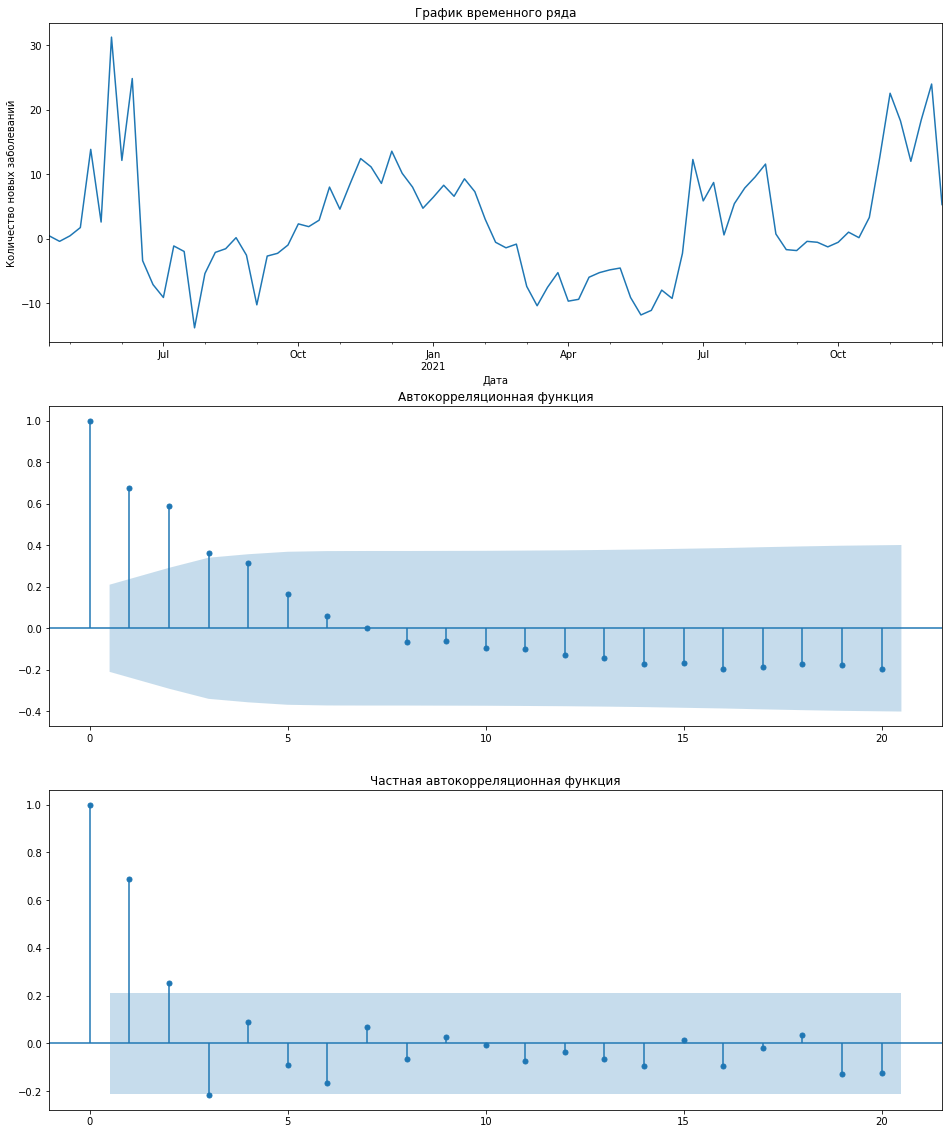

In [175]:
dif_1 = ts.diff().dropna()
adf_test(dif_1)
plot_acf_pacf(dif_1)

### График вторых разностей

In [176]:
dif_2 = ts.diff().diff().dropna()
adf_test(dif_2)
plot_acf_pacf(dif_2)

Критерий Дики-Фуллера: p=0.000000
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.000001
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.000000
Ряд стационарен


### p и q определяются по графикам АКФ и ЧАКФ для подходящего значения d

# Оценка параметров моделей

* Log Lokehood - логарифм правдоподобия
* S.D. of inovations - стандартная ошибка модели
* AIC - информационный критерий Аккаике
* BIC - информационный критерий Байеса
* HQIC - информационный критерий Хеннана-Куинна
* coef - значение коэффициента
* P>|z| - p-value для гипотезы о незначимости коэффициента (если больше 0.05 - незначим)

# Поиск 5 лучших моделей: перебор параметров

In [177]:
d = range(0, 4)
q = range(0, 8)
p = range(0, 8)

from itertools import product

parameters = list(product(p,d,q))
len(parameters)

256

In [178]:
# Может выполняться несколько минут
results = []
best_bic = float("inf")

for param in tqdm(parameters):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model = sm.tsa.ARIMA(ts, order=param).fit()
    except (ValueError, linalg.LinAlgError):
        continue
    bic = model.bic
    #сохраняем лучшую модель, bic, параметры
    if bic < best_bic:
        best_model = model
        best_bic = bic
        best_param = param
    results.append([param, model.bic])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'bic']
result_table.sort_values(by = 'bic', ascending=True).head(5)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [04:02<00:00,  1.05it/s]


parameters         bic
35  (1, 2, 0)  581.772382
13  (0, 2, 1)  584.183383
36  (1, 2, 1)  584.574527
59  (2, 2, 0)  585.474192
51  (2, 1, 0)  585.548763

### Для начала поработаем с лучшей моделью (можно указать любую модель из 5)

In [179]:
model = sm.tsa.ARIMA(ts, order=(1, 2, 1)).fit() # !!!!!!!!!!!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.new_cases   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -283.379
Method:                       css-mle   S.D. of innovations              6.520
Date:                Sun, 26 Dec 2021   AIC                            574.757
Time:                        18:11:46   BIC                            584.575
Sample:                    04-26-2020   HQIC                           578.708
                         - 12-12-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1063      0.567      0.187      0.851      -1.005       1.218
ar.L1.D2.new_cases    -0.7083      0.166     -4.268      0.000      -1.034      -0.383
ma.L1.D2.new_cases     0.3756      0.218      1.723      0.085      -0.052       0.803
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4118           +0.0000j            1.4118            0.5000
MA.1           -2.6624           +0.0000j            2.6624            0.5000
-----------------------------------------------------------------------------
"""

---

# Проверка адекватности модели

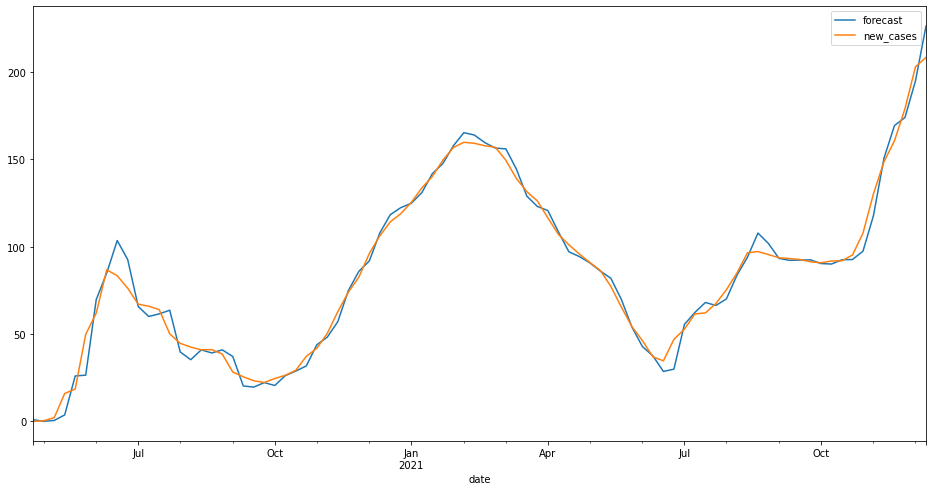

In [180]:
fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(ax=ax)
fig.show()

In [181]:
pred = model.predict(typ='levels')
print('MSE =', metrics.mean_squared_error(ts[2:], pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts[2:], pred)))
print('MAE =', metrics.mean_absolute_error(ts[2:], pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts[2:], pred))
print('R2 =', metrics.r2_score(ts[2:], pred))

MSE = 42.50916986230966
RMSE = 6.519905663605085
MAE = 4.4510095527023
MAPE = 50455250432679.1
R2 = 0.9808648765199391


# Проверка нормальности остатков

Критерий Дики-Фуллера: p=1.000000
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=1.000000
Ряд нестационарен


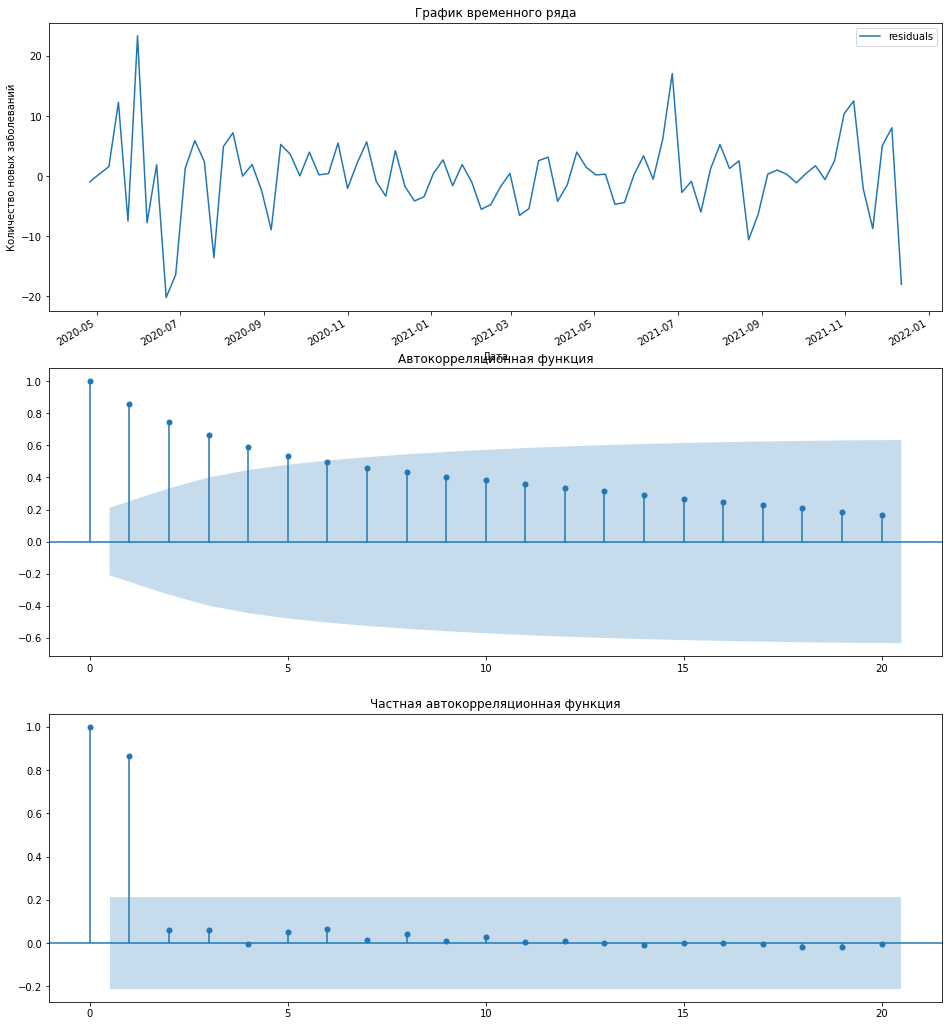

In [182]:
resid = pd.DataFrame(model.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

In [183]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

Тест на нормальность: p = 0.007710
Распределение остатков ненормальное


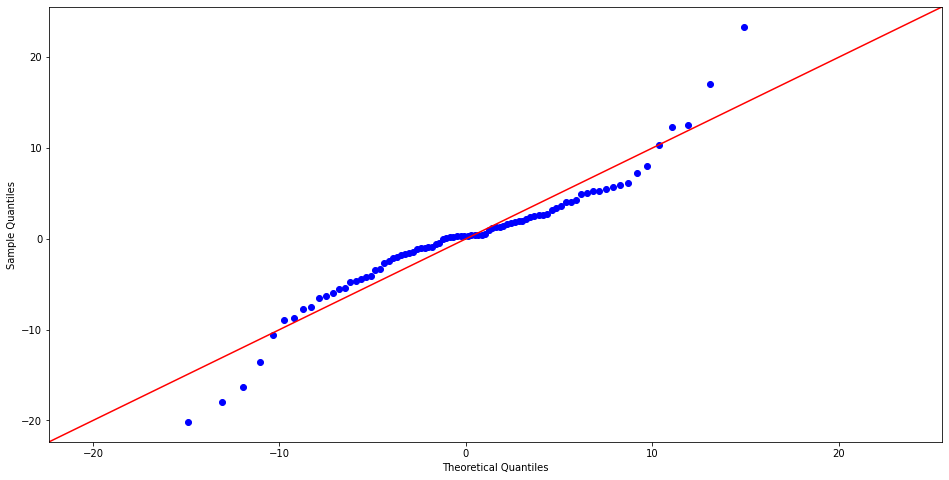

In [184]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.new_cases   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -283.379
Method:                       css-mle   S.D. of innovations              6.520
Date:                Sun, 26 Dec 2021   AIC                            574.757
Time:                        18:11:59   BIC                            584.575
Sample:                    04-26-2020   HQIC                           578.708
                         - 12-12-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1063      0.567      0.187      0.851      -1.005       1.218
ar.L1.D2.new_cases    -0.7083      0.166     -4.268      0.000      -1.034      -0.383
ma.L1.D2.new_cases     0.3756      0.218      1.723      0.085      -0.052       0.803
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4118           +0.0000j            1.4118            0.5000
MA.1           -2.6624           +0.0000j            2.6624            0.5000
-----------------------------------------------------------------------------
"""

In [186]:
ts.index

DatetimeIndex(['2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
      

Последняя дата во временном ряду:  2021-12-12 00:00:00
Предсказание на 2 недели, до: 2021-12-26 00:00:00


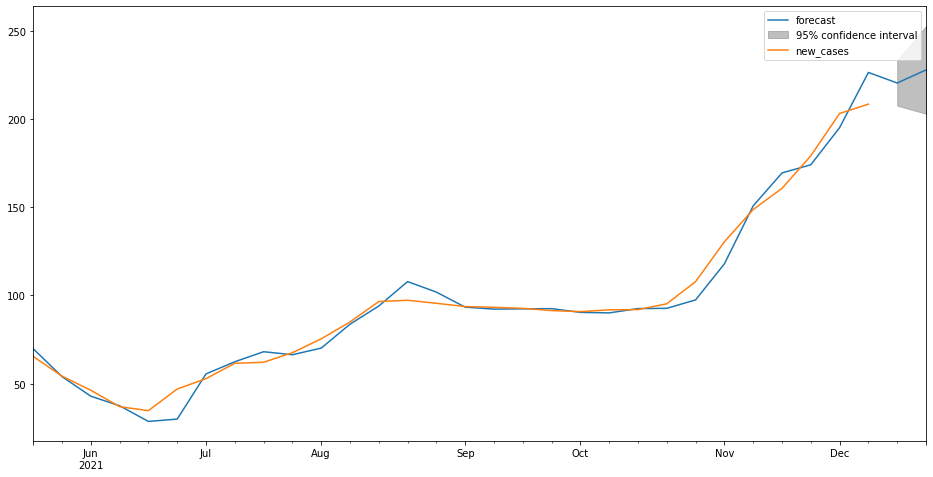

In [187]:
weeks_pred = 2 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(start=ts.index[-30], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), ax=ax)
#model.plot_predict(start=ts.index[-30], end=('2021-12-19' + str(timedelta(weeks=weeks_pred))), ax=ax)
fig.show()

In [188]:
pred = model.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

2021-12-19    220.402456
2021-12-26    227.820682
Freq: W-SUN, dtype: float64

# Соберем ансамбль предсказаний

In [189]:
result_table.sort_values(by = 'bic', ascending=True).head(5)

parameters         bic
35  (1, 2, 0)  581.772382
13  (0, 2, 1)  584.183383
36  (1, 2, 1)  584.574527
59  (2, 2, 0)  585.474192
51  (2, 1, 0)  585.548763

## Меняем параметры моделей на табличные

In [190]:
model1 = sm.tsa.ARIMA(ts, order=(1, 2, 1)).fit()
model2 = sm.tsa.ARIMA(ts, order=(0, 2, 4)).fit()
model3 = sm.tsa.ARIMA(ts, order=(0, 2, 5)).fit()
model4 = sm.tsa.ARIMA(ts, order=(0, 2, 2)).fit()
model5 = sm.tsa.ARIMA(ts, order=(0, 2, 1)).fit()

## Сохраняем предсказания ансамбля и доверительные интервалы в Excel-файл

In [191]:
forecast = pd.DataFrame(index=pred.index)
res1 = model1.forecast(weeks_pred)
res2 = model2.forecast(weeks_pred)
res3 = model3.forecast(weeks_pred)
res4 = model4.forecast(weeks_pred)
res5 = model5.forecast(weeks_pred)
forecast['value1'] = res1[0]
forecast['value2'] = res2[0]
forecast['value3'] = res3[0]
forecast['value4'] = res4[0]
forecast['value5'] = res5[0]
forecast['result'] = (forecast['value1']+forecast['value2']+forecast['value3']+forecast['value4']+forecast['value5'])/5
forecast['left_border'] = [x[0] for x in res1[2]]
forecast['right_border'] = [x[1] for x in res1[2]]
forecast.to_excel('forecast.xlsx')
forecast

value1      value2      value3      value4      value5  \
2021-12-19  220.402456  217.911281  213.950771  220.497973  219.814163   
2021-12-26  227.820682  227.490260  219.504365  232.688735  231.325826   

                result  left_border  right_border  
2021-12-19  218.515329   207.624139    233.180774  
2021-12-26  227.765974   202.977345    252.664019

# Добавим сезонность и построим SARIMA

Общий вид модели - **SARIMA (p,d,q) (P,D,Q) s**

* p - порядок модели AR
* d - порядок интегрирования
* q - порядок модели MA
* P - порядок сезонной составляющей SAR
* D - порядок интегрирования сезонной составляющей
* Q - порядок сезонной составляющей SMA
* s - размерность сезонности

### Для начала надо провести сдвиг по сезонности, можно попробовать разные, рекомендуемый 4-6 месяцев.

Сезонная разность:
Критерий Дики-Фуллера: p=0.414630
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.414630
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.557139
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.804844
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.111607
Ряд нестационарен
------------------------------
Интегрированная сезонная разность:
Критерий Дики-Фуллера: p=0.198723
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.198723
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.436970
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.601845
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.025562
Ряд стационарен


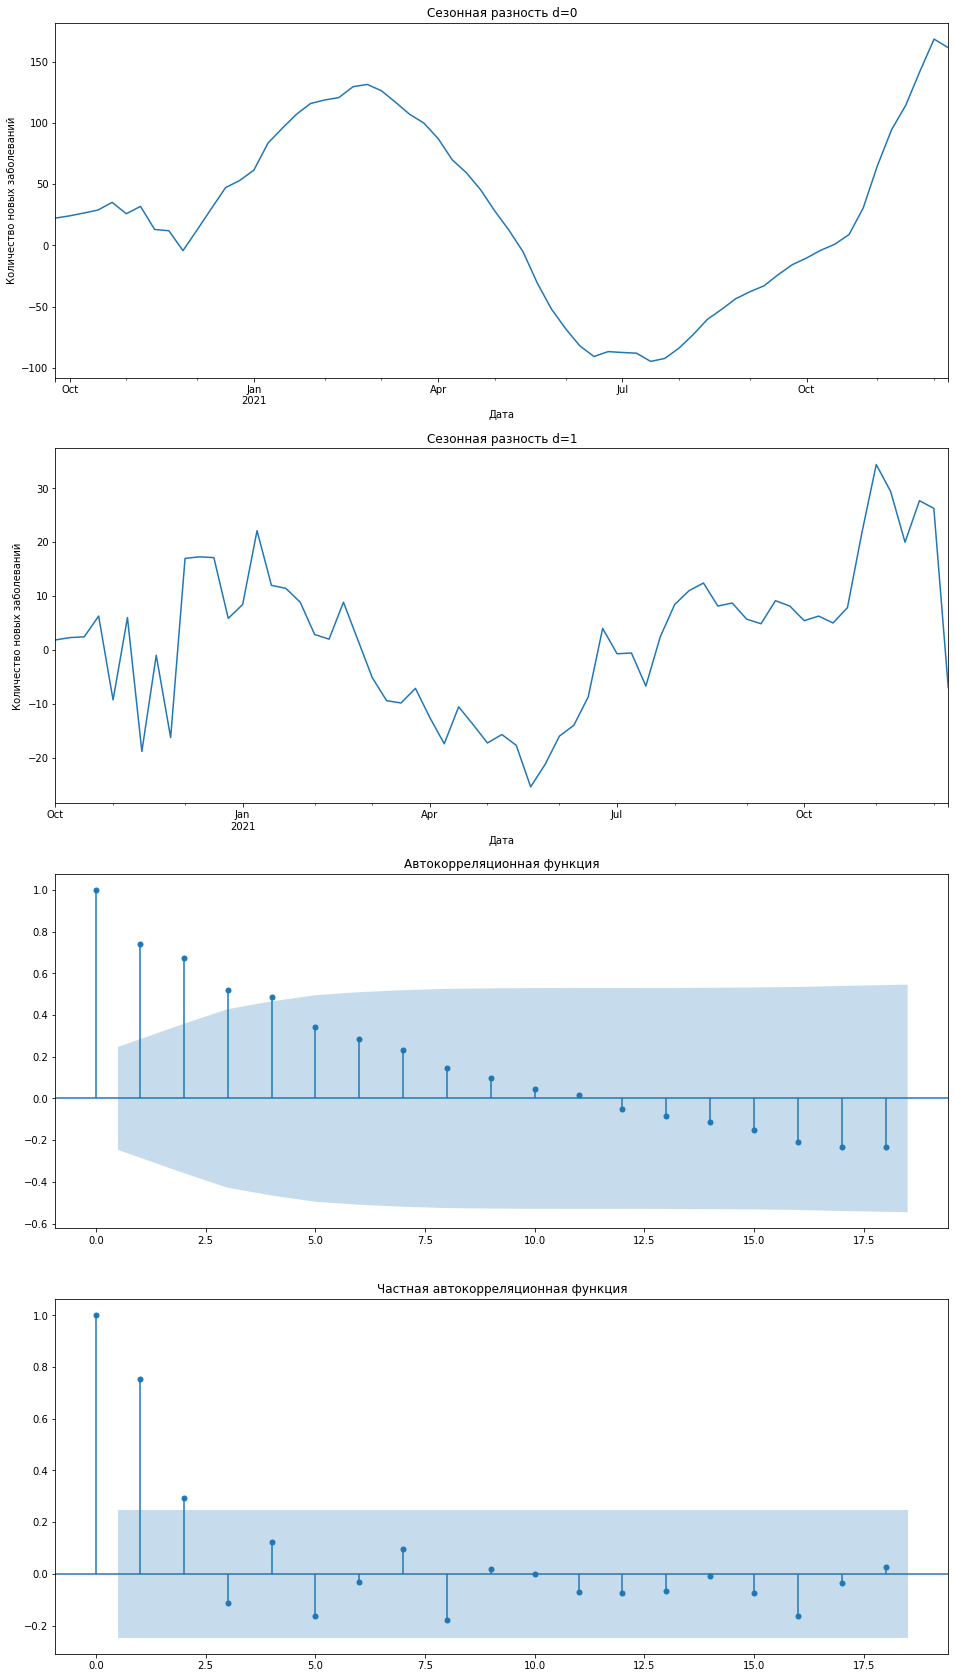

In [192]:
months_seasonal = 6 # !!!!!!!!!!!!


ts_4m = ts.diff(4*months_seasonal).dropna()
print("Сезонная разность:")
adf_test(ts_4m)

print("-"*30)
dif_4m = ts.diff(4*months_seasonal).diff().dropna()
print("Интегрированная сезонная разность:")
adf_test(dif_4m)

# dif2_4m = ts.diff(30*monhts_seasonal).diff().diff().dropna()
# adf_test(dif2_4m)

fig = plt.figure(figsize=(16,30))
    
ax0 = fig.add_subplot(411)
ts_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=0')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax0 = fig.add_subplot(412)
dif_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=1')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax1 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(dif_4m, ax=ax1)
ax1.set_title('Автокорреляционная функция')

ax2 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(dif_4m, ax=ax2)
ax2.set_title('Частная автокорреляционная функция')

fig.show()

### P и Q определяются по графикам АКФ и ЧАКФ для подходящего значения D сезонной разности

In [193]:
%%time 

#Модель SARIMA может тренироваться долго - если ставить значения параметров больше 1 время растет в геометрической прогресии... 

p = 1
d = 4
q = 1
P = 1
D = 2
Q = 1
s = 4*months_seasonal

sarima = sm.tsa.statespace.SARIMAX(ts, order=(p, d, q), 
                                seasonal_order=(P, D, Q, s)).fit()
print(sarima.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                          new_cases   No. Observations:                   88
Model:             SARIMAX(1, 4, 1)x(1, 2, 1, 24)   Log Likelihood                -153.611
Date:                            Sun, 26 Dec 2021   AIC                            317.223
Time:                                    18:12:30   BIC                            325.140
Sample:                                04-12-2020   HQIC                           319.986
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6575      0.120     -5.477      0.000      -0.893      -0.422
ma.L1         -0.9996     41.589   

---

# Проверка адекватности сезонной модели

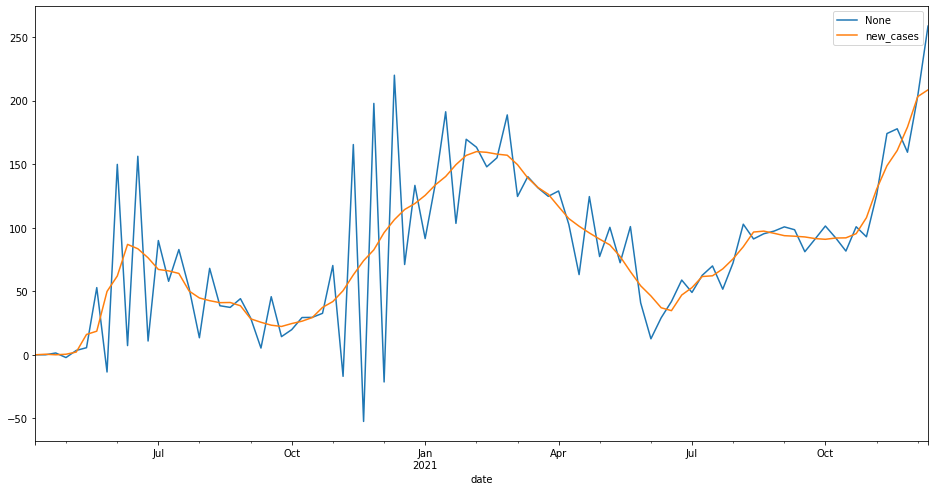

In [194]:
fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(typ='levels')
pred.plot(ax=ax)
ts.plot(ax=ax)
plt.legend()
fig.show()

In [195]:
print('MSE =', metrics.mean_squared_error(ts, pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts, pred)))
print('MAE =', metrics.mean_absolute_error(ts, pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts, pred))
print('R2 =', metrics.r2_score(ts, pred))

MSE = 1423.1882848237258
RMSE = 37.72516779053111
MAE = 22.971192443937927
MAPE = 72378745227928.36
R2 = 0.38852115612026616


# Проверка нормальности остатков

Критерий Дики-Фуллера: p=1.000000
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.999992
Ряд нестационарен


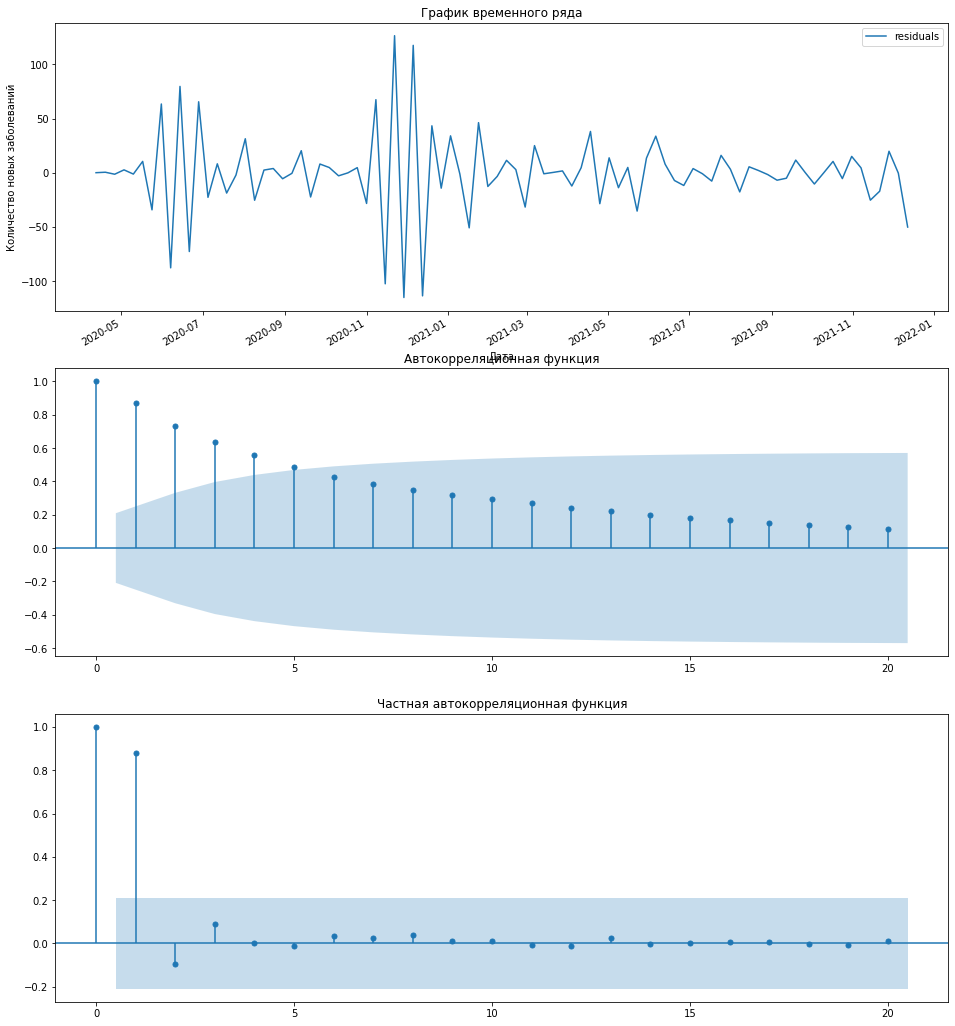

In [196]:
resid = pd.DataFrame(sarima.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

Тест на нормальность: p = 0.002250
Распределение остатков ненормальное


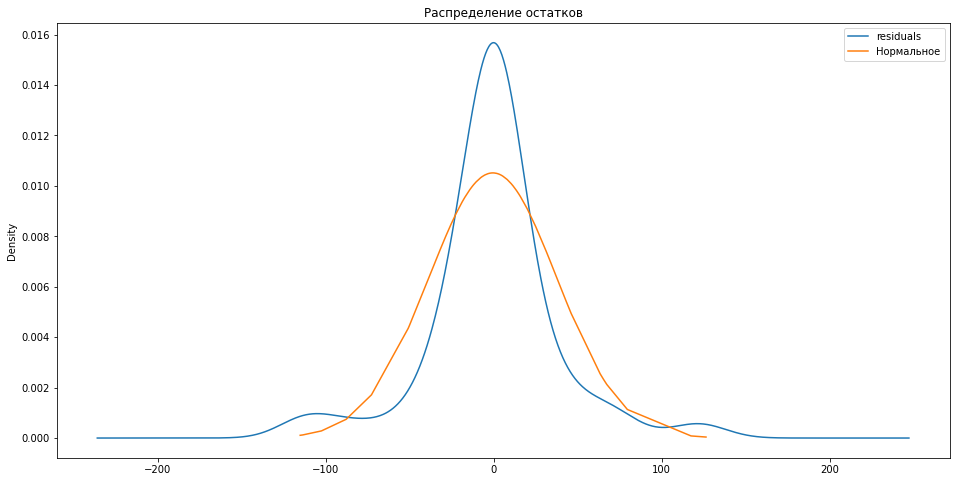

In [197]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

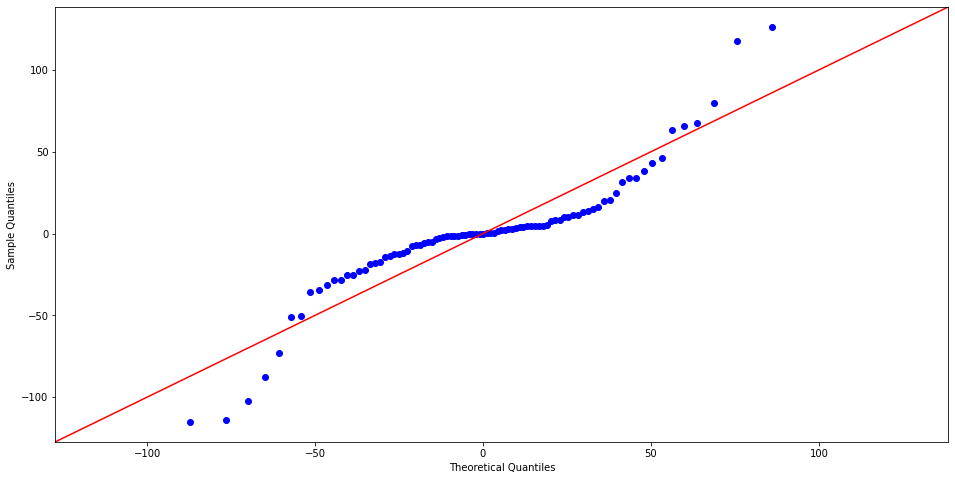

In [198]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [199]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          new_cases   No. Observations:                   88
Model:             SARIMAX(1, 4, 1)x(1, 2, 1, 24)   Log Likelihood                -153.611
Date:                            Sun, 26 Dec 2021   AIC                            317.223
Time:                                    18:12:46   BIC                            325.140
Sample:                                04-12-2020   HQIC                           319.986
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6575      0.120     -5.477      0.000      -0.893      -0.422
ma.L1         -0.9996     41.589     -0.024      0.981     -82.512      80.513
ar.S.L24       0.4873    147.589      0.003      0.997    -288.782     289.757
ma.S.L24      -0.9406    798.881     -0.001      0.999   -1566.719    1564.838
sigma2       207.7998   1.36e+05      0.002      0.999   -2.66e+05    2.67e+05
===================================================================================
Ljung-Box (Q):                       69.76   Jarque-Bera (JB):                 4.66
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               1.07   Skew:                            -0.66
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Последняя дата во временном ряду:  2021-12-12 00:00:00
Предсказание на 2 недели, до: 2021-12-26 00:00:00


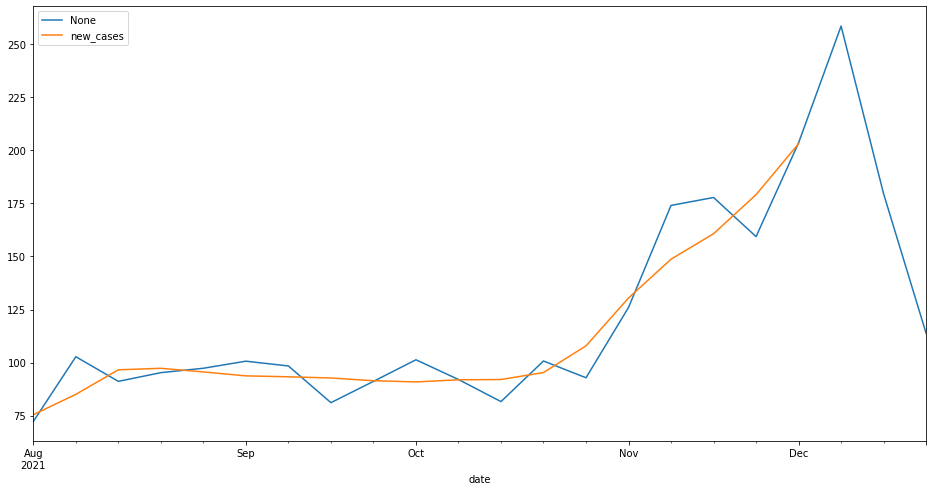

In [201]:
weeks_pred = 2 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(start=ts.index[-20], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred.plot(ax=ax)
ts[-20:-1].plot(ax=ax)
plt.legend()
fig.show()

In [202]:
pred = sarima.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

2021-12-19    179.527809
2021-12-26    113.743441
Freq: W-SUN, dtype: float64

## Сохраняем предсказания и доверительные интервалы в Excel-файл

In [203]:
forecast = pd.DataFrame(columns=['value'], index=pred.index)
res = sarima.forecast(weeks_pred)
forecast['value'] = res
forecast.to_excel('forecast_sarima.xlsx')
forecast

value
2021-12-19  179.527809
2021-12-26  113.743441